# What is the expected number to votes of a posted Question owner?

In [8]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets


In [25]:
accp_Answer= pd.read_csv('../Project/data/Acceptable answer with tag Count.csv')

#accp_Answer['owner_total_votes']=accp_Answer.owner_up_votes-accp_Answer.owner_down_votes;
accp_Answer.drop(['title','accepted_answer_id','creation_date','owner_display_name','tags','post_type_id',
                 'owner_down_votes','id','owner_user_id'],axis=1,inplace=True)

accp_Answer.head(2)
#accp_Answer= accp_Answer[(accp_Answer.score<800) & (accp_Answer.answer_count<35)&  (accp_Answer.view_count<1100000)
#                         & (accp_Answer.comment_count<40) & (accp_Answer.owner_reputation<250000) & 
#                        (accp_Answer.owner_total_votes>-5000) & (accp_Answer.owner_total_votes<14000)]

,answer_count,comment_count,score,view_count,year,owner_reputation,owner_up_votes,ownerviews,tags_count,isAnswerAccepted
0,1,0,1,256,2019,652,943,65,3,1
1,1,0,0,256,2019,1,0,4,3,0


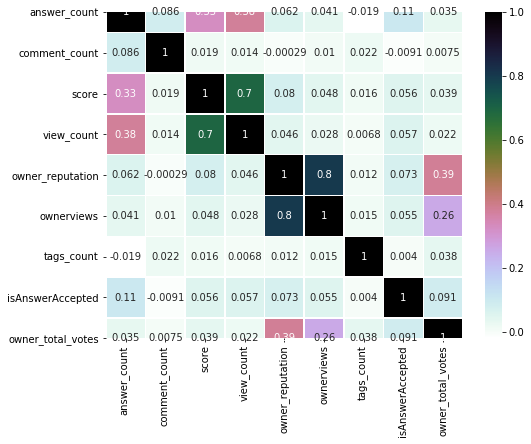

In [47]:
sns.scatterplot(x=accp_Answer.answer_count,y=accp_Answer.score,hue=accp_Answer.isAnswerAccepted)

sns.scatterplot(x=accp_Answer.view_count,y=accp_Answer.comment_count,hue=accp_Answer.isAnswerAccepted)

sns.scatterplot(x=accp_Answer.owner_reputation,y=accp_Answer.owner_up_votes,hue=accp_Answer.isAnswerAccepted)

sns.scatterplot(x=accp_Answer.view_count,y=accp_Answer.tags_count,hue=accp_Answer.isAnswerAccepted)

sns.scatterplot(x=accp_Answer.view_count,y=accp_Answer.score,hue=accp_Answer.isAnswerAccepted)

fig, ax = plt.subplots(figsize=(8,6))    
sns.heatmap(accp_Answer.corr(), annot=True,cmap='cubehelix_r', linewidths=.5, ax=ax)

In [26]:
trainX,testX,trainY,testY=train_test_split(accp_Answer.drop(['owner_up_votes'],axis=1),accp_Answer.owner_up_votes,
                                           test_size=0.2,random_state=0)
model=LinearRegression();
model.fit(trainX,trainY);
prediction=model.predict(testX)

# variance score: 1 means perfect prediction, coeficient of determination (R^2) 
print('Variance score: {}'.format(model.score(testX, testY))) 
  
model.predict(testX)

Variance score: 0.30846938827082016


array([227.99134526, 569.52601857,  72.50193569, ..., 271.50486691,
       246.57824614, 104.03131974])

<Figure size 576x432 with 0 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


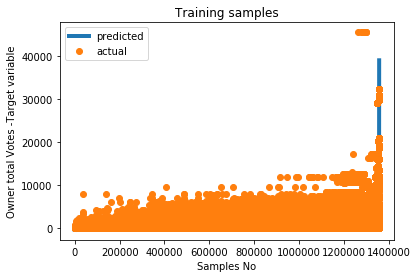

<Figure size 576x432 with 0 Axes>

In [27]:
y_predicted=model.predict(trainX)
y_temp=np.argsort(y_predicted)
plt.plot(np.arange(len(y_predicted)),y_predicted[y_temp],linewidth=4, label='predicted')
plt.plot(np.arange(len(y_predicted)),trainY.iloc[y_temp], 'o',label='actual')
plt.legend()
plt.xlabel('Samples No')
plt.ylabel('Owner total Votes -Target variable')
plt.title('Training samples')
plt.figure(figsize=(8,6))

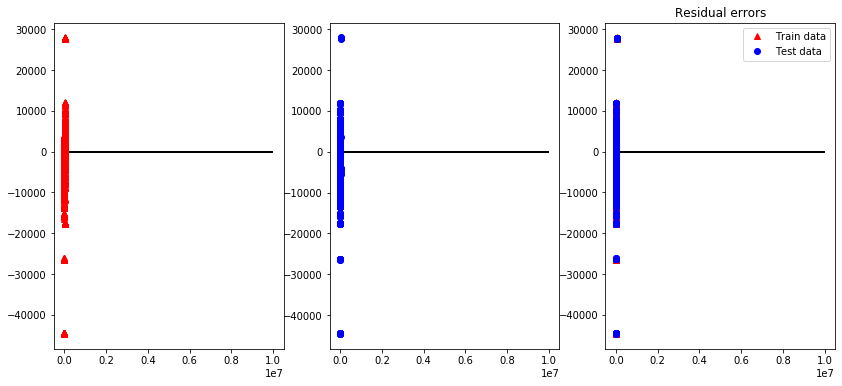

In [29]:
# plot for residual error 
plt.figure(figsize=(14,6))

plt.subplot(1,3,1)
  
## plotting residual errors in training data 
plt.plot(model.predict(trainX), model.predict(trainX) - trainY, 'r^' ,label = 'Train data') 
plt.hlines(y = 0, xmin = 0, xmax = 1e7, linewidth = 2) 

plt.subplot(1,3,2)  

plt.plot(model.predict(testX), model.predict(testX) - testY, 'bo' , label = 'Test data') 
plt.hlines(y = 0, xmin = 0, xmax = 1e7, linewidth = 2) 

plt.subplot(1,3,3)
plt.plot(model.predict(trainX), model.predict(trainX) - trainY, 'r^' ,label = 'Train data') 
plt.plot(model.predict(testX), model.predict(testX) - testY, 'bo' , label = 'Test data') 

plt.legend(loc = 0) 

## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 1e7, linewidth = 2) 

plt.title("Residual errors") 
  
## function to show plot 
plt.show() 